<a href="https://colab.research.google.com/github/Jacob130000x/Code/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline



In [ ]:
import pandas as pd
data = pd.read_csv("Average-prices-Property-Type-2019-08.csv")

In [ ]:
data.head(20)

,Date,Region_Name,Area_Code,Detached_Average_Price,Semi_Detached_Average_Price,Terraced_Average_Price,Flat_Average_Price
0,2016-09-01,England,E92000001,3.468129e+05,213476.12740,186666.65630,217712.74800
1,2016-09-01,Wales,W92000004,2.183390e+05,139442.31510,112455.49370,104113.97990
2,2016-09-01,Scotland,S92000003,2.423084e+05,146608.30480,116891.82680,101146.22410
3,2016-09-01,Northern Ireland,N92000001,1.877702e+05,121721.83410,86412.57986,97516.25130
4,2016-09-01,Outer London,E13000002,8.638264e+05,545538.67330,425596.94530,321608.08430
5,2016-09-01,Inner London,E13000001,1.349112e+06,913245.79950,686453.15850,530246.81060
6,2016-09-01,South West,E12000009,3.662269e+05,238112.50760,197260.09980,157517.68350
7,2016-09-01,Scottish Borders,S12000026,2.399581e+05,146153.04070,122753.27260,85548.52892
8,2016-09-01,Shetland Islands,S12000027,1.717416e+05,116265.87490,95438.73272,89201.91997
9,2016-09-01,South Ayrshire,S12000028,2.152116e+05,131437.94600,103151.58530,78569.26649


In [ ]:
dataH = data.filter(['Flat_Average_Price', 'Detached_Average_Price'])

dataH.dropna()
              
            #  new = old.filter(['A','B','D'], axis=1)

,Flat_Average_Price,Detached_Average_Price
0,217712.748000,346812.85520
1,104113.979900,218339.03990
2,101146.224100,242308.42640
3,97516.251300,187770.17240
4,321608.084300,863826.43410
...,...,...
15475,80302.176226,214481.01961
15476,80983.619458,224646.23211
15477,220403.358650,377160.03097
15478,203452.279450,366642.69524


In [ ]:
dataH.head(20)


,Flat_Average_Price,Detached_Average_Price
0,217712.74800,3.468129e+05
1,104113.97990,2.183390e+05
2,101146.22410,2.423084e+05
3,97516.25130,1.877702e+05
4,321608.08430,8.638264e+05
5,530246.81060,1.349112e+06
6,157517.68350,3.662269e+05
7,85548.52892,2.399581e+05
8,89201.91997,1.717416e+05
9,78569.26649,2.152116e+05


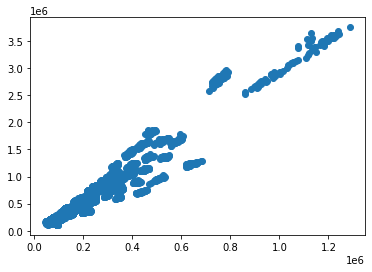

In [ ]:
plt.scatter(dataH['Flat_Average_Price'], dataH['Detached_Average_Price'])

In [ ]:
dataNew = dataH.round(2)
dataNew = dataNew.fillna(0)

In [ ]:
dataNew.head()

,Flat_Average_Price,Detached_Average_Price
0,217712.75,346812.86
1,104113.98,218339.04
2,101146.22,242308.43
3,97516.25,187770.17
4,321608.08,863826.43


In [ ]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat_Average_Price      15480 non-null  float64
 1   Detached_Average_Price  15444 non-null  float64
dtypes: float64(2)
memory usage: 242.0 KB


In [ ]:
km = KMeans(n_clusters = 2 )
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
dataNew.dtypes

Flat_Average_Price        float64
Detached_Average_Price    float64
dtype: object

In [ ]:
y_predict  = km.fit_predict(dataNew[['Flat_Average_Price', 'Detached_Average_Price']])
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
dataNew['Label'] = y_predict
dataNew.head()

,Flat_Average_Price,Detached_Average_Price,Label
0,217712.75,346812.86,0
1,104113.98,218339.04,0
2,101146.22,242308.43,0
3,97516.25,187770.17,0
4,321608.08,863826.43,1


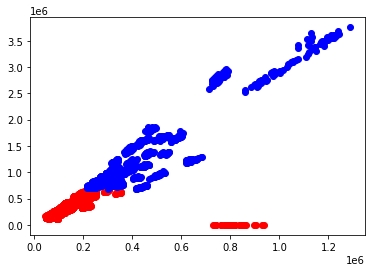

In [ ]:
data0 = dataNew[dataNew.Label == 0]
data1 = dataNew[dataNew.Label == 1]
plt.scatter(data0['Flat_Average_Price'], data0['Detached_Average_Price'], color='red')
plt.scatter(data1['Flat_Average_Price'], data1['Detached_Average_Price'], color= 'blue')

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataNew)
#scaler.fit(dataNew[['Flat_Average_Price']])
#dataNew.reshape(-1,1)
#dataNew['Flat_Average_Price'] = scaler.transform(dataNew['Flat_Average_Price'])


In [ ]:
scaled

array([[0.13813362, 0.09234001, 0.        ],
       [0.04658423, 0.05813345, 0.        ],
       [0.04419251, 0.06451538, 0.        ],
       ...,
       [0.14030199, 0.10042004, 0.        ],
       [0.12664109, 0.09761976, 0.        ],
       [0.12664109, 0.09602716, 0.        ]])

AttributeError: ignored

In [ ]:
df = pd.DataFrame(scaled, columns = ['Flat_Average_Price','Detached_Average_Price', 'Cluster'])


In [ ]:
df.head

<bound method NDFrame.head of        Flat_Average_Price  Detached_Average_Price  Cluster
0                0.138134                0.092340      0.0
1                0.046584                0.058133      0.0
2                0.044193                0.064515      0.0
3                0.041267                0.049994      0.0
4                0.221863                0.229996      1.0
...                   ...                     ...      ...
15475            0.027394                0.057106      0.0
15476            0.027943                0.059813      0.0
15477            0.140302                0.100420      0.0
15478            0.126641                0.097620      0.0
15479            0.126641                0.096027      0.0

[15480 rows x 3 columns]>

In [ ]:
y_predict = km.fit_predict(df[['Flat_Average_Price', 'Detached_Average_Price']])
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df['Cluster'] = y_predict
df 

,Flat_Average_Price,Detached_Average_Price,Cluster
0,0.138134,0.092340,0
1,0.046584,0.058133,0
2,0.044193,0.064515,0
3,0.041267,0.049994,0
4,0.221863,0.229996,1
...,...,...,...
15475,0.027394,0.057106,0
15476,0.027943,0.059813,0
15477,0.140302,0.100420,0
15478,0.126641,0.097620,0


In [ ]:
km = KMeans(n_clusters = 4, n_init=20 )

In [ ]:
y_predict = km.fit_predict(df[['Flat_Average_Price', 'Detached_Average_Price']])
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

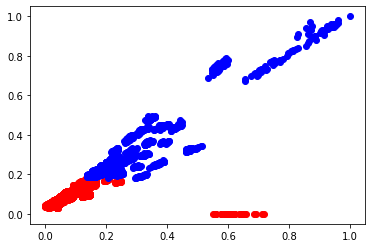

In [ ]:
data0 = df[dataNew.Label == 0]
data1 = df[dataNew.Label == 1]

plt.scatter(data0['Flat_Average_Price'], data0['Detached_Average_Price'], color='red')
plt.scatter(data1['Flat_Average_Price'], data1['Detached_Average_Price'], color= 'blue')